Aaron Kohn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nypd = pd.read_csv('2011.csv')

C:\Users\aarme\anaconda3.2\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (73,103) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
nypd.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2011,102,185,1012011,0,A,O,P,1,BURGLARY,...,,102,B,,,1030708,194185,CM,1,14
1,2011,115,50,1012011,5,A,O,P,1,FEL,...,,115,I,,,1021302,213563,CM,1,85
2,2011,100,4,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20
3,2011,100,3,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20
4,2011,100,1,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20


In [4]:
nypd.describe()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,revcmd,dob,age,ht_feet,ht_inch,weight,linecm,detailcm
count,685724.0,685724.000000,685724.000000,6.857240e+05,685724.000000,685724.000000,685724.000000,685724.0,685724.0,685724.000000,6.857240e+05,685724.000000,685724.000000,685724.000000,685724.000000,685724.0,685724.000000
mean,2011.0,67.375982,6327.886804,6.502490e+06,1435.877044,2.397559,5.571476,0.0,0.0,227.133444,8.939846e+06,29.398764,5.179049,6.415804,169.323824,1.0,41.331130
std,0.0,32.736376,5288.245687,3.467433e+06,727.141924,5.635170,12.795386,0.0,0.0,284.161860,3.839904e+06,37.221556,0.394506,3.342623,37.683693,0.0,27.462302
min,2011.0,1.000000,1.000000,1.012011e+06,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.011900e+06,0.000000,3.000000,0.000000,0.000000,1.0,1.000000
25%,2011.0,42.000000,2297.000000,3.252011e+06,1034.000000,1.000000,3.000000,0.0,0.0,63.000000,6.041988e+06,19.000000,5.000000,4.000000,150.000000,1.0,20.000000
50%,2011.0,71.000000,4961.000000,6.212011e+06,1630.000000,1.000000,5.000000,0.0,0.0,106.000000,1.031198e+07,24.000000,5.000000,7.000000,165.000000,1.0,29.000000
75%,2011.0,101.000000,9134.000000,9.302011e+06,2028.000000,2.000000,5.000000,0.0,0.0,165.000000,1.231190e+07,34.000000,5.000000,9.000000,180.000000,1.0,68.000000
max,2011.0,123.000000,31381.000000,1.231201e+07,2359.000000,955.000000,999.000000,0.0,0.0,881.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000,1.0,113.000000


In [5]:
# convert dob and 'datestop' to datetime object
def eight_digit(date):
    # add zero for corect formating
    if len(date) == 7:
        date = '0' + date
    return date
# Format string for conversion
nypd['dob'] = nypd['dob'].apply(lambda x : eight_digit(str(x)))
nypd['datestop'] = nypd['datestop'].apply(lambda x : eight_digit(str(x)))
# Convert to datetime
nypd['dob2'] = pd.to_datetime(nypd['dob'], format= '%m%d%Y', errors= 'coerce')
nypd['datestop2'] = pd.to_datetime(nypd['datestop'], format= '%m%d%Y')
# add calculated age 
nypd['age2'] = round((nypd['datestop2'] - nypd['dob2']).dt.days/365)
# If calculated age unreasonable replace with age, replace extremes with nan
nypd.loc[nypd['age2'] > 100,  'age2'] = nypd['age']
nypd.loc[nypd['age2'] > 100,  'age2'] = np.nan
nypd.loc[nypd['age2'] < 10, 'age2'] = nypd['age']
nypd.loc[nypd['age2'] < 10, 'age2'] = np.nan
nypd.loc[nypd['age2'] > 100,  'age2'] = np.nan
# Check result
print('Total age2 nan =',  sum(nypd['age2'].isna()))
nypd[['dob2', 'datestop2', 'age2']]


Total age2 nan = 2296


,dob2,datestop2,age2
0,1989-09-12,2011-01-01,21.0
1,1995-07-01,2011-01-01,16.0
2,1993-03-15,2011-01-01,18.0
3,1993-03-20,2011-01-01,18.0
4,1990-09-01,2011-01-01,20.0
...,...,...,...
685719,1900-12-31,2011-12-31,22.0
685720,1992-05-07,2011-12-31,20.0
685721,1991-09-17,2011-12-31,20.0
685722,1989-10-02,2011-12-31,22.0


In [6]:
# Check results
nypd[nypd['age']>100]['age2']

201        NaN
323       27.0
428        NaN
1332       NaN
1333       NaN
          ... 
684458     NaN
684460     NaN
684988     NaN
685209     NaN
685650    23.0
Name: age2, Length: 1786, dtype: float64

In [7]:
def replace(group):
    # Replace outliers with mean
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 4*std
    group[outliers] = group[~outliers].mean()
    outliers = (group - mean).abs() < -3*std
    group[outliers] = group[~outliers].mean()
    return group

# Replace weight outliers by group
nypd['weight'] = nypd[['weight', 'build', 'sex']].groupby(['sex','build']).transform(replace)

In [8]:
# convert to datetime
nypd['timestop'] = nypd['timestop'].astype('str').str.zfill(4)
nypd['timestop'] = pd.to_datetime(nypd['timestop'], format= '%H%M').dt.time
nypd['timestop']

0         00:00:00
1         00:05:00
2         00:07:00
3         00:07:00
4         00:07:00
            ...   
685719    23:55:00
685720    23:58:00
685721    23:58:00
685722    23:58:00
685723    23:58:00
Name: timestop, Length: 685724, dtype: object

In [9]:
nypd['full_height'] = (nypd['ht_feet'] * 12) + nypd['ht_inch']
nypd['full_height']

0         68
1         66
2         67
3         67
4         75
          ..
685719    66
685720    69
685721    69
685722    70
685723    66
Name: full_height, Length: 685724, dtype: int64

In [10]:
# Drop unwanted columns (see documentation)
nypd2 = nypd.drop(['year', 'ser_num', 'recstat', 'typeofid', 'explnstp', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen',
                  'compyear', 'comppct', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap',
                  'knifcuti', 'machgun', 'othrweap', 'radio', 'ac_rept', 'ac_inves', 'sb_hdobj', 'sb_outln', 'sb_admis',
                  'sb_other', 'repcmd', 'revcmd', 'forceuse', 'dob', 'addrtyp', 'rescode', 'premtype', 'state', 'zip',
                   'xcoord', 'ycoord', 'dettypcm', 'linecm', 'datestop' ], axis= 1)

In [11]:
nypd2.head()

,pct,timestop,inout,trhsloc,perobs,crimsusp,perstop,othpers,offunif,officrid,...,city,addrpct,sector,beat,post,detailcm,dob2,datestop2,age2,full_height
0,102,00:00:00,O,P,1,BURGLARY,6,N,N,,...,QUEENS,102,B,,,14,1989-09-12,2011-01-01,21.0,68
1,115,00:05:00,O,P,1,FEL,2,N,N,,...,QUEENS,115,I,,,85,1995-07-01,2011-01-01,16.0,66
2,100,00:07:00,O,H,1,CPW,2,Y,Y,,...,QUEENS,100,B,4,34,20,1993-03-15,2011-01-01,18.0,67
3,100,00:07:00,O,H,1,CPW,2,Y,Y,,...,QUEENS,100,B,4,34,20,1993-03-20,2011-01-01,18.0,67
4,100,00:07:00,O,H,1,CPW,2,Y,Y,,...,QUEENS,100,B,4,34,20,1990-09-01,2011-01-01,20.0,75


In [19]:
nypd2.dtypes

pct              int64
timestop        object
inout           object
trhsloc         object
perobs         float64
                ...   
age2           float64
full_height      int64
pf_any          object
pf_type         object
pf_total         int64
Length: 74, dtype: object

In [13]:
# Switch numeric caegorical variables to type ctegory
nypd2[['pct', 'detailcm']] = nypd2[['pct', 'detailcm']].astype('category')

In [14]:
nypd2.replace(999, np.NAN, inplace= True )

In [15]:
# remove original columns 
nypd2.drop(['age','ht_feet','ht_inch'],axis=1, inplace=True)

In [16]:
nypd2.describe()

,perobs,perstop,weight,age2,full_height
count,685724.000000,685635.000000,685724.000000,683428.000000,685724.000000
mean,2.397559,5.442523,168.769220,28.278926,68.564389
std,5.635170,5.968257,28.681157,11.770294,3.181265
min,0.000000,0.000000,1.000000,10.000000,36.000000
25%,1.000000,3.000000,150.000000,19.000000,67.000000
50%,1.000000,5.000000,165.000000,24.000000,69.000000
75%,2.000000,5.000000,180.000000,34.000000,71.000000
max,955.000000,958.000000,780.000000,100.000000,95.000000


<AxesSubplot:>

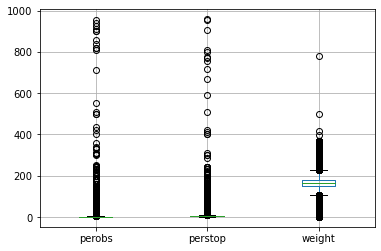

In [17]:
# check for outliers
nypd2[['perobs', 'perstop', 'weight']].boxplot()

In [18]:
# Replace outliers
nypd2[['perobs','perstop']] = nypd2[['perobs','perstop']].transform(replace)

In [19]:
nypd2.describe()

,perobs,perstop,weight,age2,full_height
count,685724.000000,685635.000000,685724.000000,683428.000000,685724.000000
mean,2.179666,5.223339,168.769220,28.278926,68.564389
std,2.233722,3.339420,28.681157,11.770294,3.181265
min,0.000000,0.000000,1.000000,10.000000,36.000000
25%,1.000000,3.000000,150.000000,19.000000,67.000000
50%,1.000000,5.000000,165.000000,24.000000,69.000000
75%,2.000000,5.000000,180.000000,34.000000,71.000000
max,24.000000,29.000000,780.000000,100.000000,95.000000


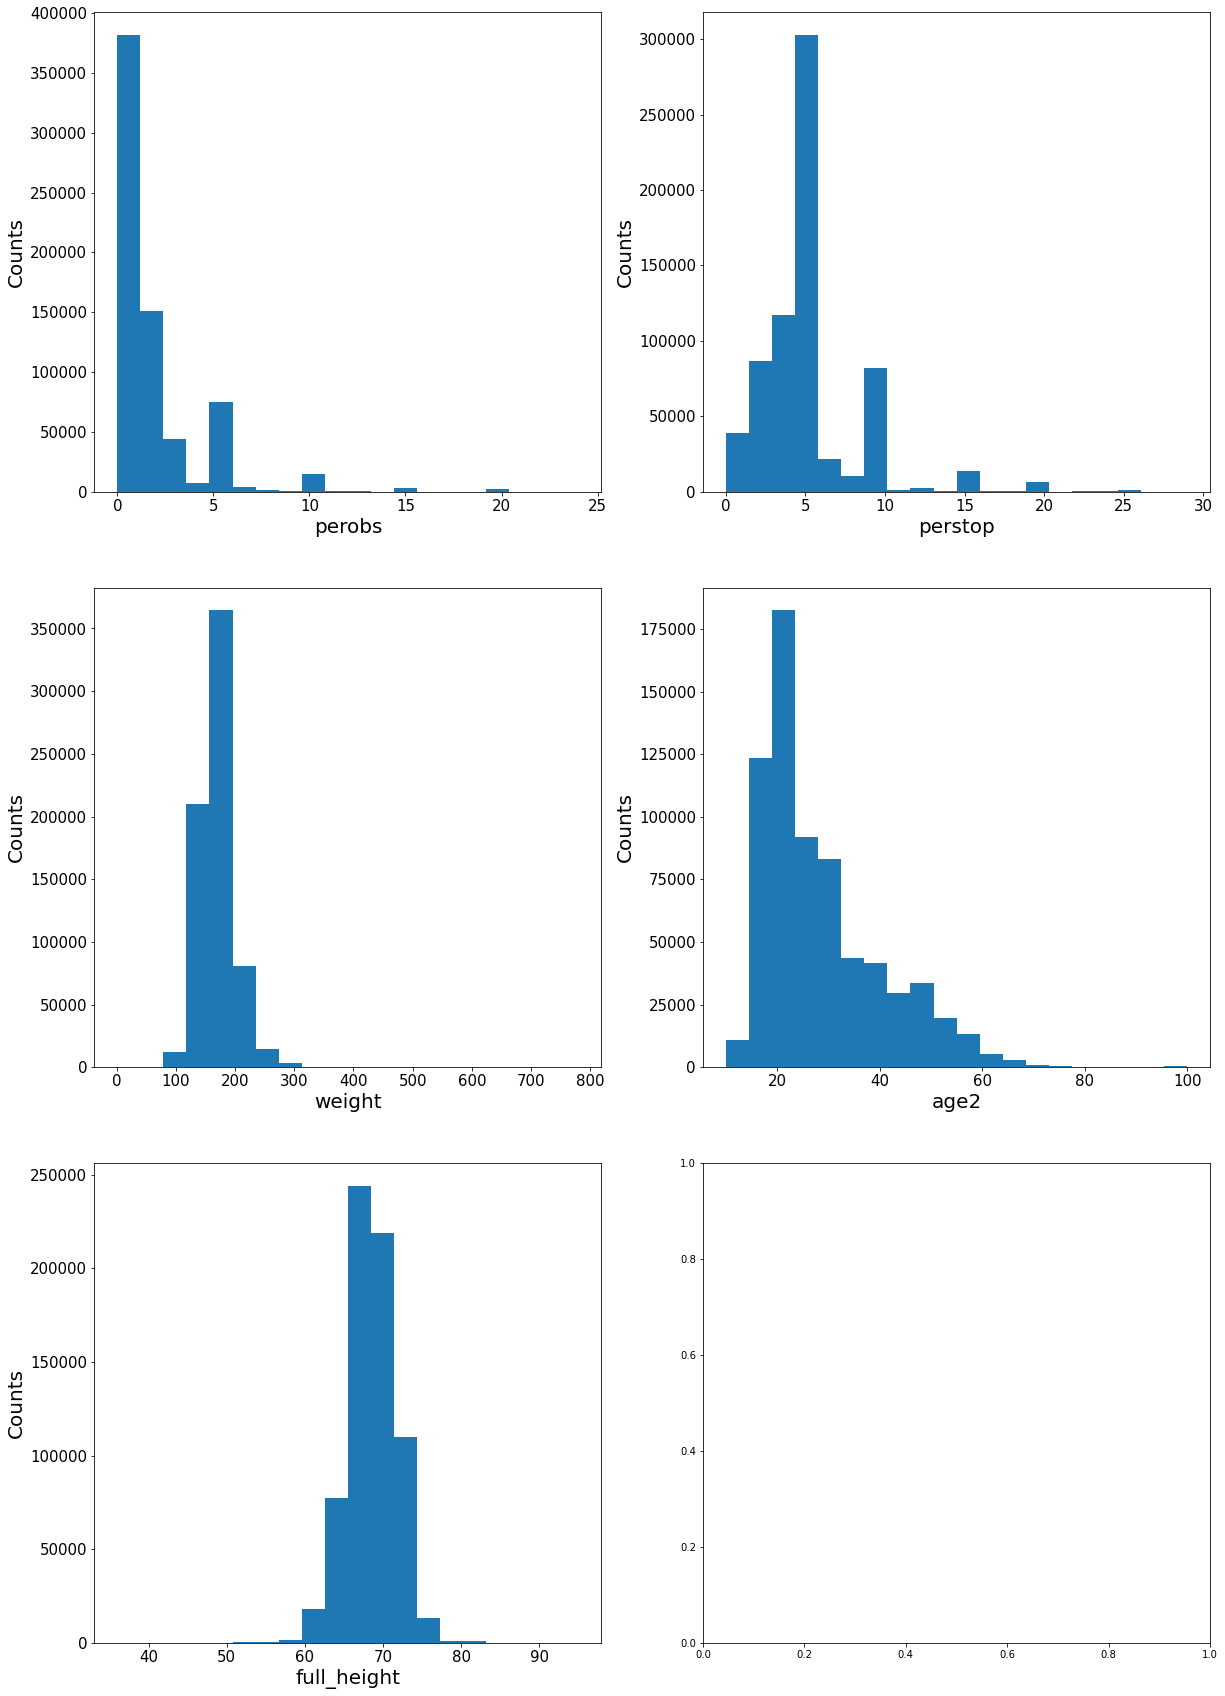

In [20]:
# Histograms for numeric variables
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 30)

# Specify the features of interest
num_features = nypd2.select_dtypes(include=['int64','float64']).columns
xaxes = num_features
yaxes = ['Counts']*12

# make subplots
fig, axes = plt.subplots(int((len(num_features)+1) / 2), ncols = 2)

# draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    if idx < len(num_features):
        ax.hist(nypd2[num_features[idx]].dropna(), bins= 20)
        ax.set_xlabel(xaxes[idx], fontsize=20)
        ax.set_ylabel(yaxes[idx], fontsize=20)
        ax.tick_params(axis='both', labelsize=15)


Index(['timestop'], dtype='object')
Index(['addrpct'], dtype='object')


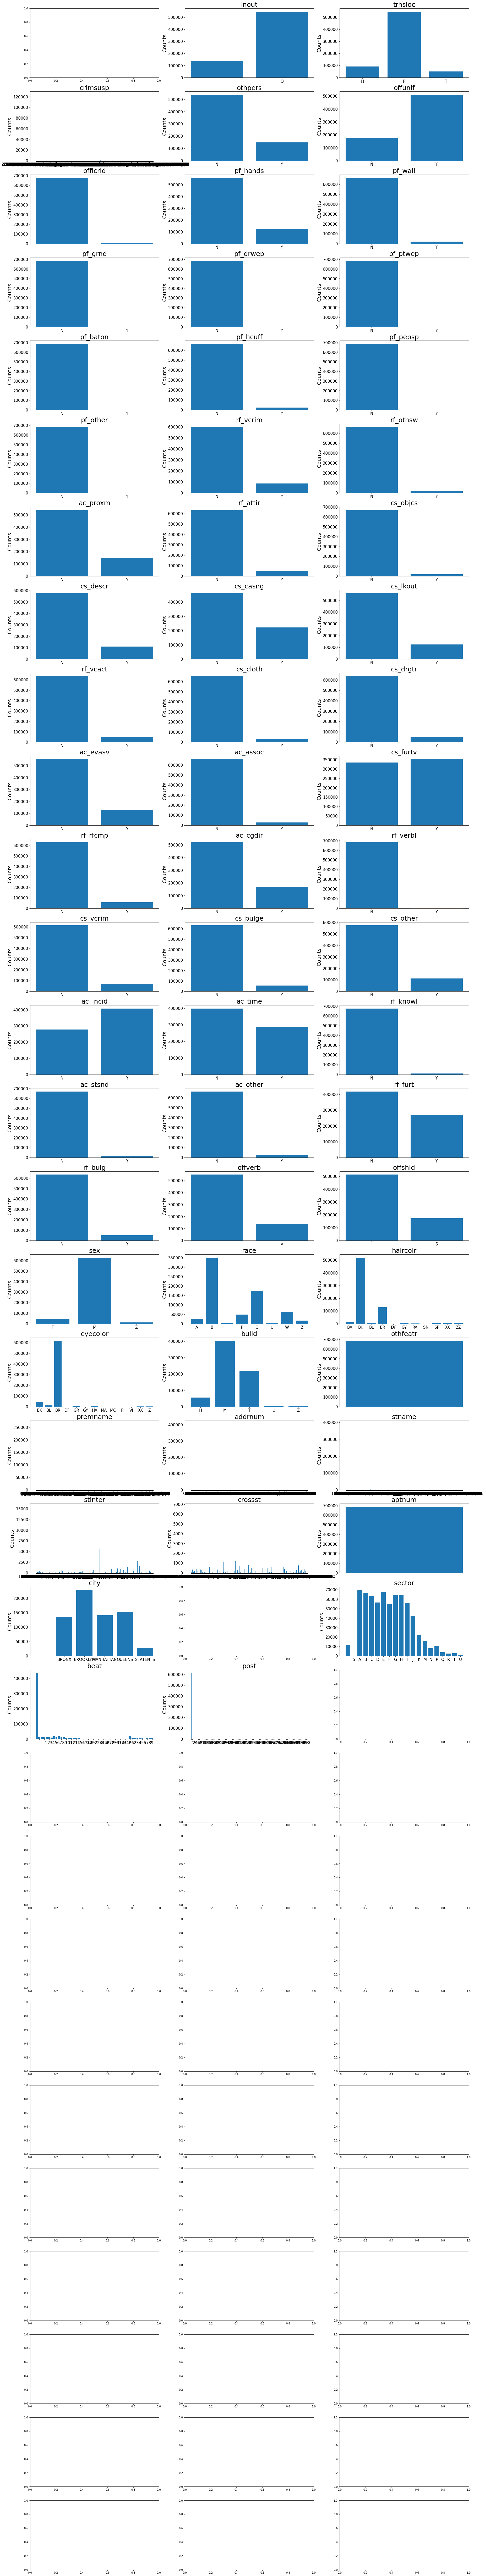

In [21]:
# Bar charts for categorical data
plt.rcParams['figure.figsize'] = (30, 180)



# Specify the features of interest
obj_features = nypd2.select_dtypes(include=['object']).columns
xaxes = num_features
yaxes = ['Counts']*17

# make subplots
fig, axes = plt.subplots(nrows =int((len(obj_features)+1)/2) , ncols = 3)

# draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    
        if idx < len(obj_features):
            try:
                # make the data read to feed into the visulizer
                Y = nypd2.groupby(obj_features[idx]).size().reset_index(name='Counts')['Counts']
                X = nypd2.groupby(obj_features[idx]).size().reset_index(name='Counts')[obj_features[idx]]
                # make the bar plot
                ax.bar(X, Y)
                ax.set_title(obj_features[idx], fontsize=25)
                ax.set_ylabel('Counts', fontsize=20)
                ax.tick_params(axis='both', labelsize=15)
            except:
                print(nypd2[[obj_features[idx]]].columns)

## Setting target variables

In [22]:
# Select target columns
target = nypd2.loc[:, nypd2.columns.str.startswith('pf')]
# Create column to indicate if any physical force was used
target['pf_any'] = 'N'
for col in target.columns[:-1]:
    target['pf_any'] = np.where(target['pf_any']=="N", target[col], target['pf_any'])
target.describe()

<ipython-input-22-5f66819b9de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pf_any'] = 'N'
<ipython-input-22-5f66819b9de0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pf_any'] = np.where(target['pf_any']=="N", target[col], target['pf_any'])


,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,pf_any
count,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724
unique,2,2,2,2,2,2,2,2,2,2
top,N,N,N,N,N,N,N,N,N,N
freq,559318,664870,683340,684494,683976,685637,662654,685617,681903,537645


In [23]:
# Create column to indicate force if used (if more than one used only one will be included)
target['pf_type'] = 'N'
for col in target.columns[:-2]:
 
    target['pf_type'] = np.where(target[col]=="Y", col, target['pf_type'])
target.describe()

<ipython-input-23-f5a0a3072e7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pf_type'] = 'N'
<ipython-input-23-f5a0a3072e7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pf_type'] = np.where(target[col]=="Y", col, target['pf_type'])


,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,pf_any,pf_type
count,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724
unique,2,2,2,2,2,2,2,2,2,2,10
top,N,N,N,N,N,N,N,N,N,N,N
freq,559318,664870,683340,684494,683976,685637,662654,685617,681903,537645,537645


In [24]:
# Create column to indicate amount of types used
target['total'] = target.iloc[:,:-2].eq('Y').mul(1).sum(axis=1)
target

<ipython-input-24-4aecf540c54b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['total'] = target.iloc[:,:-2].eq('Y').mul(1).sum(axis=1)


,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,pf_any,pf_type,total
0,Y,N,N,N,N,N,N,N,N,Y,pf_hands,1
1,N,N,N,N,N,N,N,N,N,N,N,0
2,Y,Y,N,N,N,N,N,N,N,Y,pf_wall,2
3,Y,N,N,N,N,N,N,N,N,Y,pf_hands,1
4,Y,N,N,N,N,N,N,N,N,Y,pf_hands,1
...,...,...,...,...,...,...,...,...,...,...,...,...
685719,N,N,N,N,N,N,N,N,N,N,N,0
685720,N,N,N,N,N,N,N,N,N,N,N,0
685721,N,N,N,N,N,N,N,N,N,N,N,0
685722,N,N,N,N,N,N,N,N,N,N,N,0


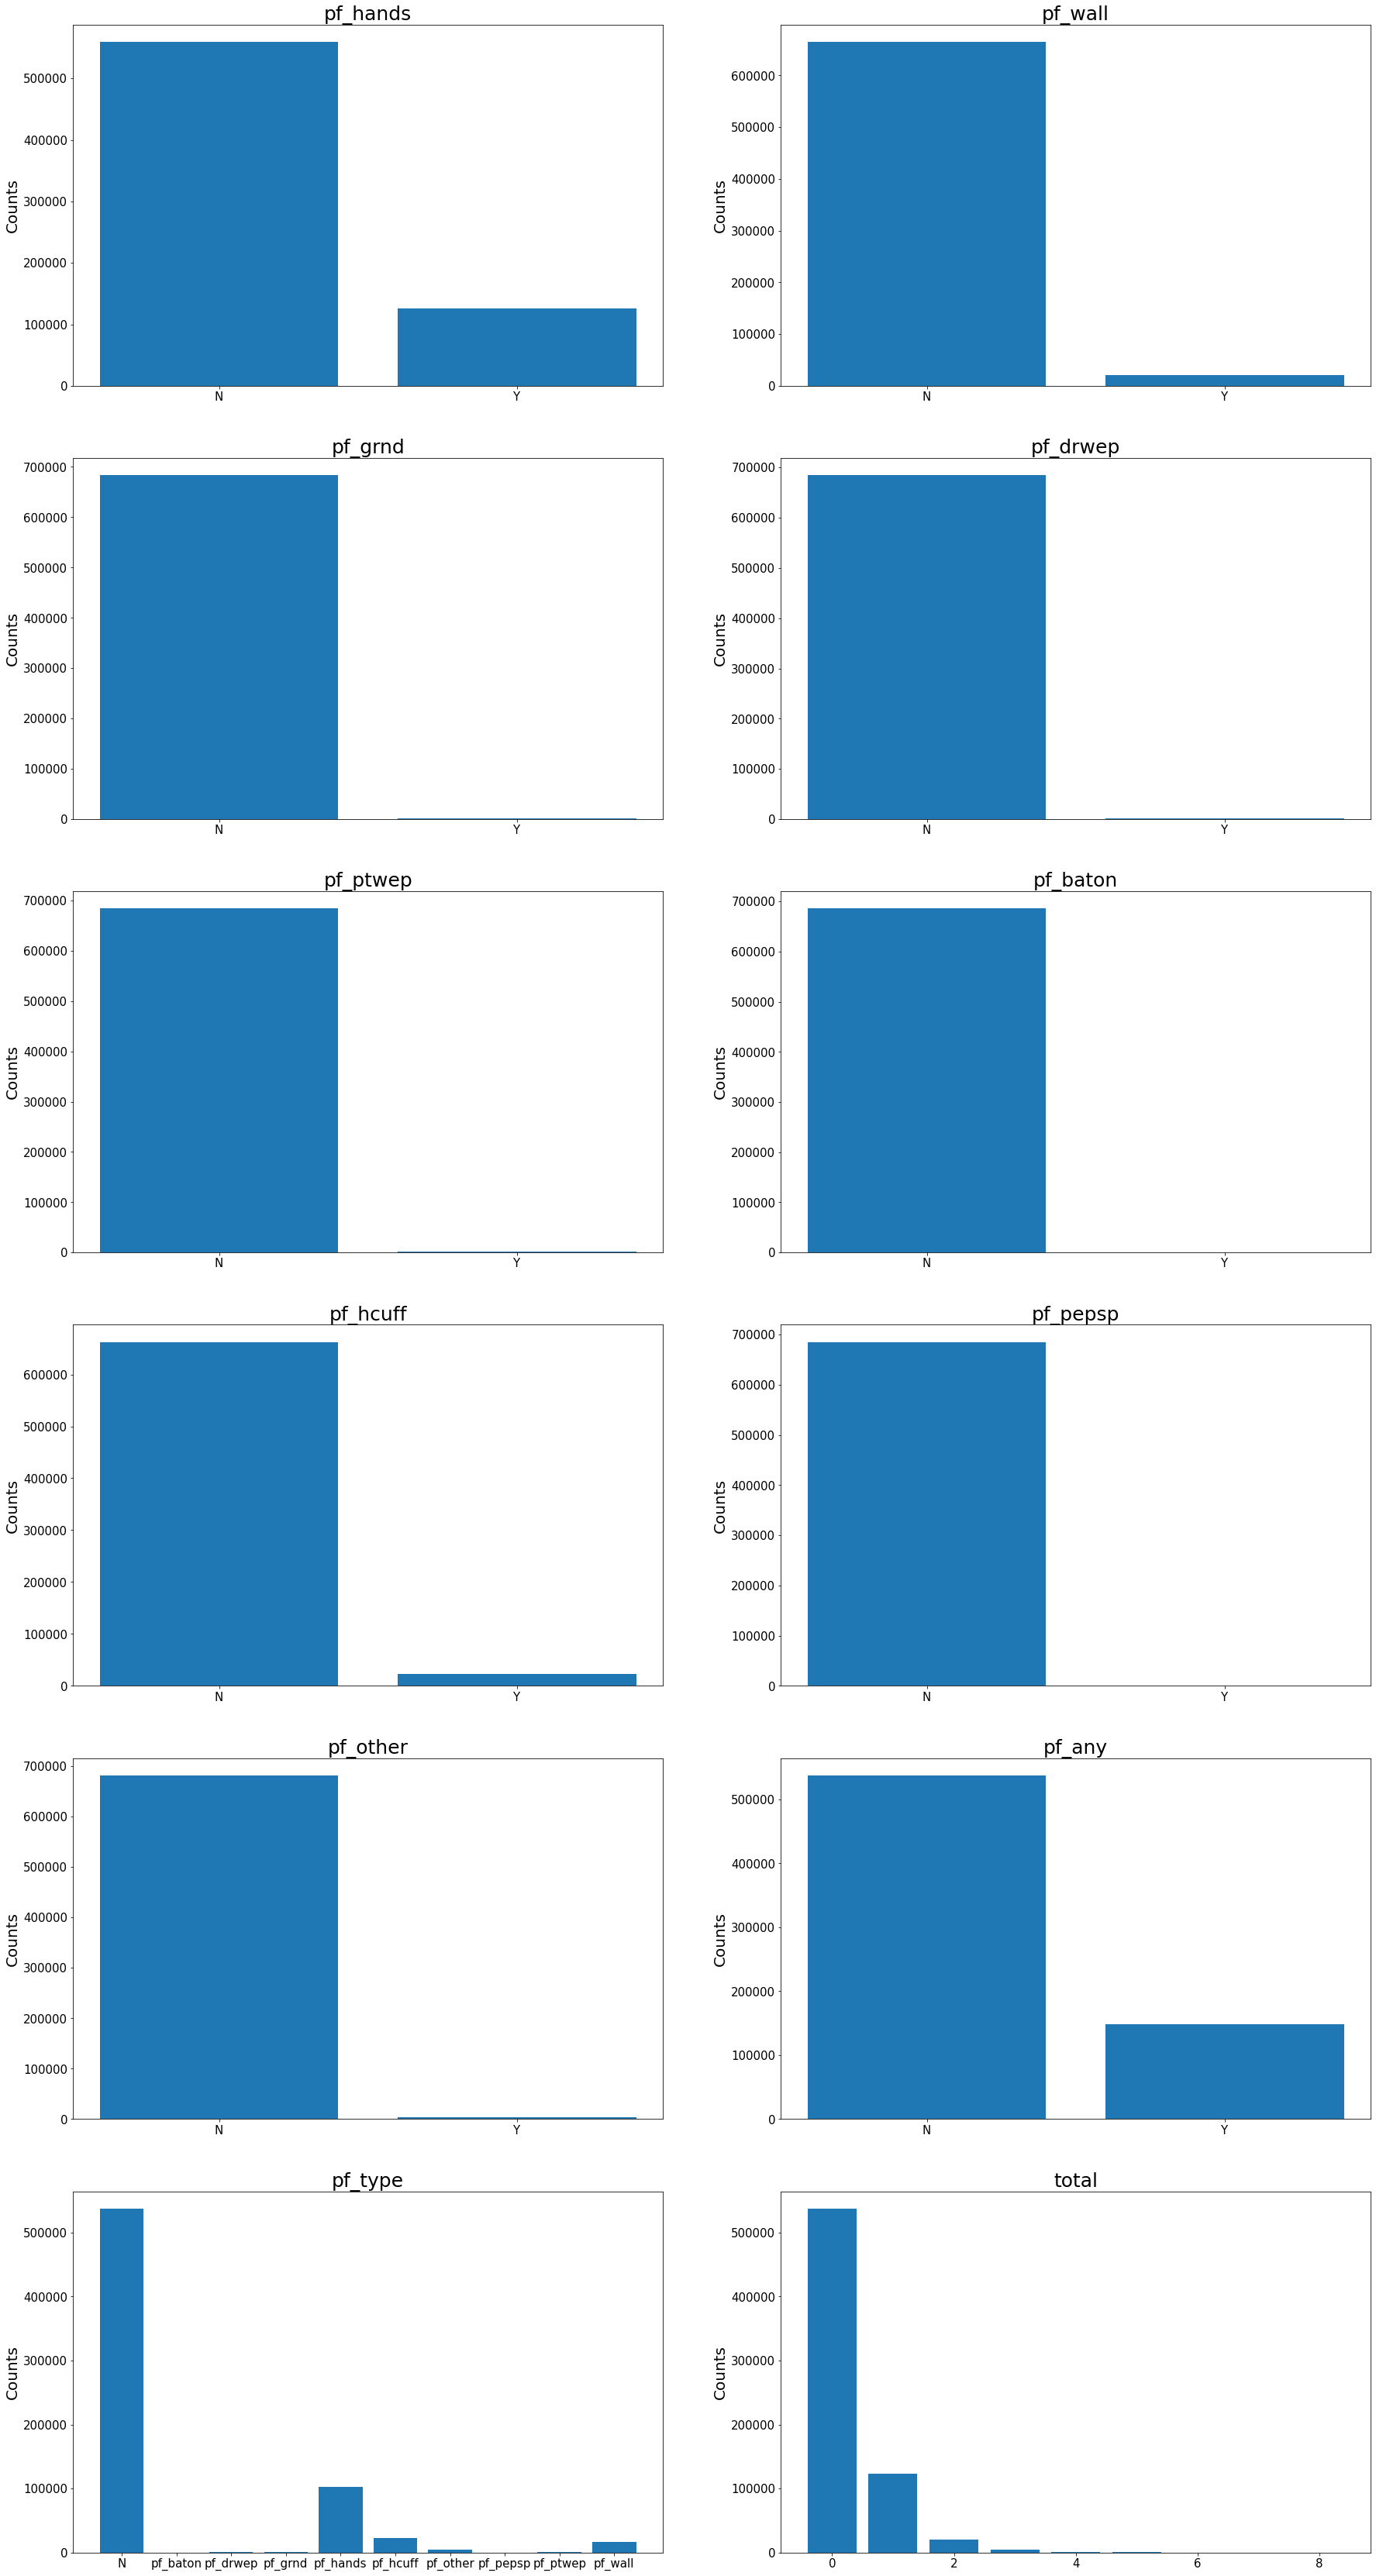

In [25]:
# Create bar charts of target variables
plt.rcParams['figure.figsize'] = (30, 60)

# make subplots
fig, axes = plt.subplots(nrows =6 , ncols = 2)

features = target.columns
xaxes = features
yaxes = ['Counts']*17

# draw bargraphs
axes = axes.ravel()

for idx, ax in enumerate(axes):
    
        if idx < len(features):
            try:
                # make the data read to feed into the visulizer
                #Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
                Y = target.groupby(features[idx]).size().reset_index(name='Counts')['Counts']
                X = target.groupby(features[idx]).size().reset_index(name='Counts')[features[idx]]
                # make the bar plot
                ax.bar(X, Y)
                ax.set_title(features[idx], fontsize=25)
                ax.set_ylabel('Counts', fontsize=20)
                ax.tick_params(axis='both', labelsize=15)
            except:
                print(target[[features[idx]]].columns)

In [26]:
# Return new columns to original dataset

nypd2[['pf_any', 'pf_type', 'pf_total']] = target[['pf_any', 'pf_type', 'total']] 

In [27]:
nypd2[['pf_any', 'pf_type', 'pf_total']]

,pf_any,pf_type,pf_total
0,Y,pf_hands,1
1,N,N,0
2,Y,pf_wall,2
3,Y,pf_hands,1
4,Y,pf_hands,1
...,...,...,...
685719,N,N,0
685720,N,N,0
685721,N,N,0
685722,N,N,0


In [6]:
nypd2 = pd.read_csv('nypd.csv')

In [11]:
nypd2.drop('officrid', axis=1, inplace=True)

In [15]:
nypd[nypd['officrid']== "I"]

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
66,2011,42,12,1012011,100,A,O,P,1,FEL,...,,42,E,,,1012899,242796,CM,1,20
461,2011,1,55,1012011,524,1,I,T,5,GRAND LARCENY,...,,1,E,,,981349,198508,CM,1,45
531,2011,1,12,1012011,924,1,I,T,5,GRAND LARCENY,...,,1,E,,,981349,198508,CM,1,45
595,2011,9,14,1012011,1243,1,O,P,1,CPCS,...,,9,C,3,,987398,202661,CM,1,24
820,2011,14,109,1012011,1910,A,I,P,5,HARASSMENT,...,,14,F,16,89,986012,213226,CM,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684857,2011,18,3661,12312011,1310,1,I,T,5,FEL,...,,18,D,,,989294,215445,CM,1,95
685422,2011,40,17598,12312011,2150,1,O,P,5,CPW,...,,40,G,5,,,,CM,1,20
685478,2011,24,4956,12312011,2210,A,O,P,2,GLA,...,,24,A,,,990757,226482,CM,1,46
685481,2011,40,17600,12312011,2210,1,O,P,8,ROBBERY,...,,40,I,11,,1006233,235217,CM,1,85


In [21]:
for col in nypd2.select_dtypes(include=['object']).columns:
    nypd2[col].str.strip()

In [22]:
nypd2.head()

,pct,timestop,inout,trhsloc,perobs,crimsusp,perstop,othpers,offunif,officrid,...,beat,post,detailcm,dob2,datestop2,age2,full_height,pf_any,pf_type,pf_total
0,102,00:00:00,O,P,1.0,BURGLARY,6.0,N,N,,...,,,14,1989-09-12,2011-01-01,21.0,68,Y,pf_hands,1
1,115,00:05:00,O,P,1.0,FEL,2.0,N,N,,...,,,85,1995-07-01,2011-01-01,16.0,66,N,N,0
2,100,00:07:00,O,H,1.0,CPW,2.0,Y,Y,,...,4,34,20,1993-03-15,2011-01-01,18.0,67,Y,pf_wall,2
3,100,00:07:00,O,H,1.0,CPW,2.0,Y,Y,,...,4,34,20,1993-03-20,2011-01-01,18.0,67,Y,pf_hands,1
4,100,00:07:00,O,H,1.0,CPW,2.0,Y,Y,,...,4,34,20,1990-09-01,2011-01-01,20.0,75,Y,pf_hands,1


In [23]:
# Save dataset
nypd2.to_csv('nypd.csv', index= False)